In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

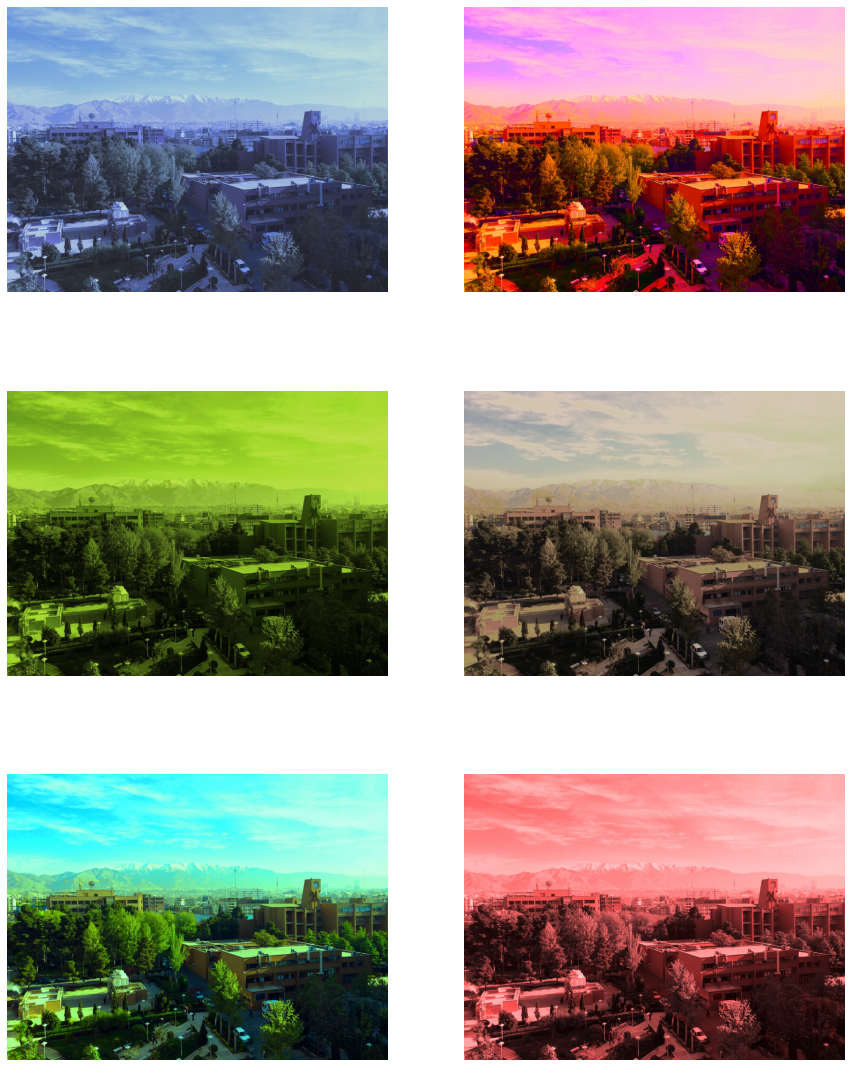

In [47]:
num_of_images = 6

imgs = []
for i in range(num_of_images):
    img = cv2.imread(f'images/{i}.jpg', cv2.IMREAD_COLOR)[:, :, ::-1].astype(np.float32)
    imgs.append(img)

# plot degraded images
fig = plt.figure(figsize=(15, 20))
for i in range(num_of_images):
    ax = plt.subplot(3, 2, i+1)
    ax.axis('off')
    ax.imshow(imgs[i] / 255)

In [73]:
def pca(X, k):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    normalized = (X - mean) / std
    cov_matrix = np.cov(normalized,  rowvar=False)
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    
    sorted_indices  = np.argsort(eig_val)[::-1]
    eig_vec = eig_vec[:, sorted_indices]

    transformed = eig_vec[:, :k].T @ normalized.T
    return transformed

In [75]:
original_image = np.zeros_like(imgs[0]).astype(np.float32)

red_channels = [img[:, :, 0] for img in imgs]
green_channels = [img[:, :, 1] for img in imgs]
blue_channels = [img[:, :, 2] for img in imgs]

red_channels = np.array(red_channels).transpose((1, 2, 0))

red_channels_flat = red_channels.reshape((-1, 6))
out = pca(red_channels_flat, 1)
out = out.reshape(original_image.shape[:2])
original_image[:, :, 0] = (out - out.min()) / (out.max() - out.min())
print('Red Channel Reconstructed')

green_channels = np.array(green_channels).transpose((1, 2, 0))
green_channels_flat = green_channels.reshape((-1, 6))
out = pca(green_channels_flat, 1)
out = out.reshape(original_image.shape[:2])
original_image[:, :, 1] = (out - out.min()) / (out.max() - out.min())
print('Green Channel Reconstructed')

blue_channels = np.array(blue_channels).transpose((1, 2, 0))
blue_channels_flat = blue_channels.reshape((-1, 6))
out = pca(blue_channels_flat, 1)
out = out.reshape(original_image.shape[:2])
original_image[:, :, 2] = (out - out.min()) / (out.max() - out.min())
print('Blue Channel Reconstructed')

Red Channel Reconstructed
Green Channel Reconstructed
Blue Channel Reconstructed


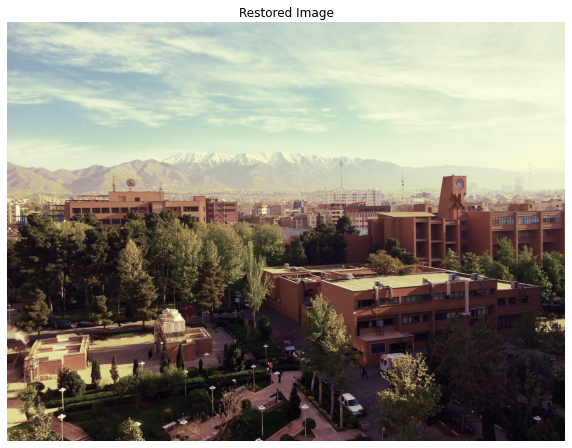

In [77]:
fig = plt.figure(figsize=(10, 15))
plt.title('Restored Image')
plt.axis('off')
plt.imshow(original_image)